In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

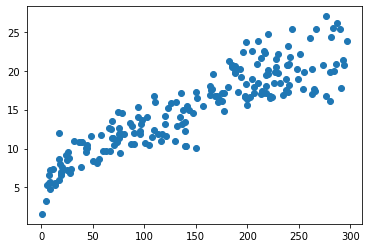

In [6]:
plt.scatter(x=df['TV'], y=df['Sales'])

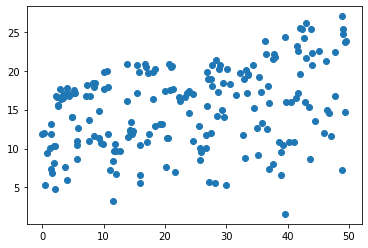

In [7]:
plt.scatter(x=df['Radio'], y=df['Sales'])

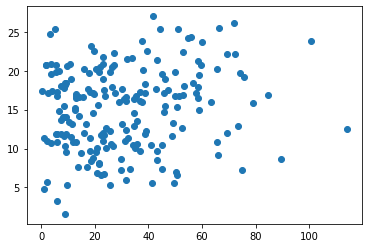

In [8]:
plt.scatter(x=df['Newspaper'], y=df['Sales'])

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


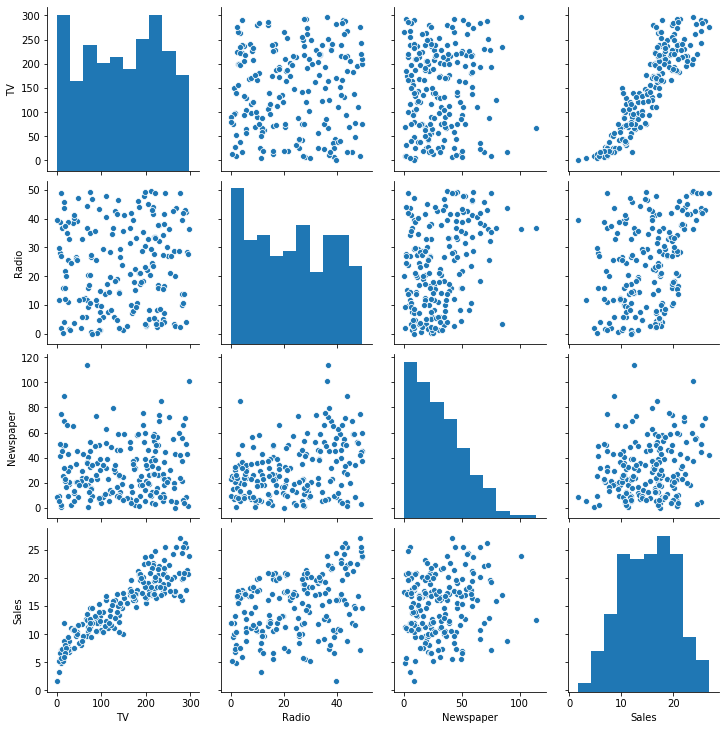

In [13]:
sns.pairplot(df)

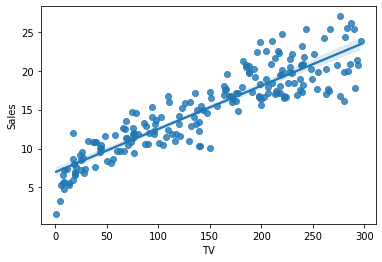

In [15]:
sns.regplot(x='TV', y='Sales', data=df)

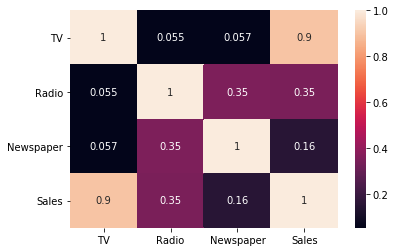

In [19]:
sns.heatmap(df.corr(), annot=True)

# Linear Regression model using Statsmodels library

In [21]:
X = df['TV']
y = df['Sales']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [27]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [28]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [30]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.52e-52
Time:                        14:42:48   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

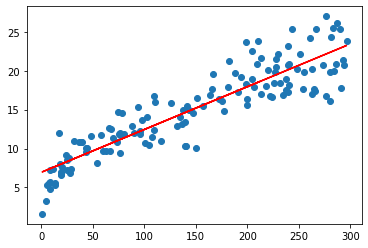

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.95+0.055*X_train, 'r')
plt.show()

In [35]:
y_train_pred = lr_model.predict(X_train_sm)

# Residual Analysis

In [36]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'Residual Analysis')

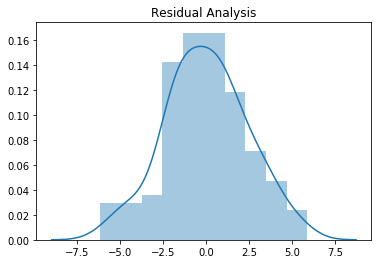

In [40]:
sns.distplot(res)
plt.title('Residual Analysis')

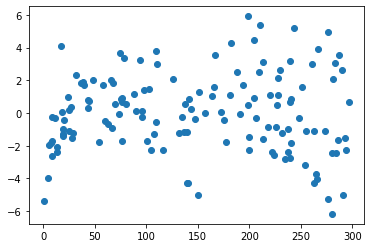

In [41]:
plt.scatter(X_train, res)

# Predict on test Set

In [44]:
X_test_sm = sm.add_constant(X_test)

In [45]:
y_test_pred = lr_model.predict(X_test_sm)

In [47]:
r2 = r2_score(y_test, y_test_pred)
r2

0.7921031601245658

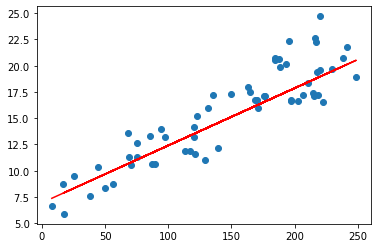

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [49]:
mse = mean_squared_error(y_test, y_test_pred)
mse

4.077556371826956

# Linear Regression model using Sklearn library

In [51]:
lm = LinearRegression()

In [55]:
X_train_new = X_train.values.reshape(-1, 1)
X_test_new = X_test.values.reshape(-1, 1)

In [56]:
lm.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [64]:
Y_train_pr = lm.predict(X_train_new)
Y_test_pr = lm.predict(X_test_new)

In [67]:
r2_score(y_train, Y_train_pr)

0.8157933136480389

In [68]:
r2_score(y_test, Y_test_pr)

0.7921031601245662